In [1]:
import nltk.classify.util
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import movie_reviews
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import requests

In [2]:
#Asi es como el Naive Bayes clasifica los aspectos de la entrada
def create_word_features(words):
    useful_words = [word for word in words if word not in stopwords.words("english")]
    my_dict = dict([(word, True) for word in useful_words])
    return my_dict
#este es el formato que NaiveBayes entiende
create_word_features(["the", "quick", "Santy", "quick", "a", "Carlongos"])

{'quick': True, 'Santy': True, 'Carlongos': True}

In [3]:
neg_reviews = []
for fileid in movie_reviews.fileids('neg'):
    words = movie_reviews.words(fileid)
    neg_reviews.append((create_word_features(words), "negative"))

In [4]:
print(neg_reviews[0])

({'plot': True, ':': True, 'two': True, 'teen': True, 'couples': True, 'go': True, 'church': True, 'party': True, ',': True, 'drink': True, 'drive': True, '.': True, 'get': True, 'accident': True, 'one': True, 'guys': True, 'dies': True, 'girlfriend': True, 'continues': True, 'see': True, 'life': True, 'nightmares': True, "'": True, 'deal': True, '?': True, 'watch': True, 'movie': True, '"': True, 'sorta': True, 'find': True, 'critique': True, 'mind': True, '-': True, 'fuck': True, 'generation': True, 'touches': True, 'cool': True, 'idea': True, 'presents': True, 'bad': True, 'package': True, 'makes': True, 'review': True, 'even': True, 'harder': True, 'write': True, 'since': True, 'generally': True, 'applaud': True, 'films': True, 'attempt': True, 'break': True, 'mold': True, 'mess': True, 'head': True, '(': True, 'lost': True, 'highway': True, '&': True, 'memento': True, ')': True, 'good': True, 'ways': True, 'making': True, 'types': True, 'folks': True, 'snag': True, 'correctly': Tr

In [5]:
pos_reviews = []
for fileid in movie_reviews.fileids('pos'):
    words = movie_reviews.words(fileid)
    pos_reviews.append((create_word_features(words), "positive"))

In [6]:
print(pos_reviews[0])

({'films': True, 'adapted': True, 'comic': True, 'books': True, 'plenty': True, 'success': True, ',': True, 'whether': True, "'": True, 'superheroes': True, '(': True, 'batman': True, 'superman': True, 'spawn': True, ')': True, 'geared': True, 'toward': True, 'kids': True, 'casper': True, 'arthouse': True, 'crowd': True, 'ghost': True, 'world': True, 'never': True, 'really': True, 'book': True, 'like': True, 'hell': True, '.': True, 'starters': True, 'created': True, 'alan': True, 'moore': True, 'eddie': True, 'campbell': True, 'brought': True, 'medium': True, 'whole': True, 'new': True, 'level': True, 'mid': True, '80s': True, '12': True, '-': True, 'part': True, 'series': True, 'called': True, 'watchmen': True, 'say': True, 'thoroughly': True, 'researched': True, 'subject': True, 'jack': True, 'ripper': True, 'would': True, 'saying': True, 'michael': True, 'jackson': True, 'starting': True, 'look': True, 'little': True, 'odd': True, '"': True, 'graphic': True, 'novel': True, '500': T

In [7]:
#Entrenamiento
train_set = neg_reviews[:750] + pos_reviews[:750]
test_set = neg_reviews[750:] + pos_reviews[750:]
print("Entrenamiento: ",len(train_set),"Testeo: ", len(test_set))

Entrenamiento:  1500 Testeo:  500


In [8]:
classifier = NaiveBayesClassifier.train(train_set)

In [9]:
accuracy = nltk.classify.accuracy(classifier, test_set)
print(accuracy * 100)

72.39999999999999


In [10]:
review = '''
very good movie I loved this movie
'''
print(review)


very good movie I loved this movie



In [11]:
words = word_tokenize(review)
words = create_word_features(words)
classifier.classify(words)


'positive'

In [12]:
import tweepy

In [13]:
#Se importa sleep, datetime, TextBlob y matplotlib
from time import sleep
from datetime import datetime
from textblob import TextBlob 
import matplotlib.pyplot as plt 
%matplotlib inline

In [51]:
def Traduccion(source,target, text):
    parametros = {'sl': source, 'tl': target, 'q': text}
    cabecera = {"Charset":"UTF-8","User-Agent":"AndroidTranslate/5.3.0.RC02.130475354.53000263 5.1 phone TRANSLATE_OPMS_T"}
    url="https://translate.google.com/translate_a/single?client=at&dt=t&dt=ld&dt=qca&dt=rm&dt=bd&dj=1&h1=es-ES&ie=UTF-&&"
    response = requests.post(url, data=parametros, headers=cabecera)
    if response.status_code==200:
        for x in response.json()['sentences']:
            return x['trans']
    else:
        return "There's been a problem"

In [52]:
consumer_key = 'BoCT323cKdysG99siFGOMIDcN'
consumer_secret = 'vwBEVJHo4BMMEoe4aTjR9f3taOlz9wsiZ56GiRsRha0mhivBUO'
access_token = '936070088373006337-ynzitn8LmgFwnNrpexYexgp6bsch51H'
access_token_secret = 'bUEFYIVILegYXVZVqnoE8jTrN5wC6Gb6KhF2dAfKajNnJ'
#Se autentica en twitter
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

#se verifica que el usuario conectado en twitter es de uno
print(api.me().name)

harold apaza


In [71]:
palabra = '@NicholasLBarber'
#Se define la cantida de tweets a capturar
numero_de_Tweets = 200
#Se define el idioma de los tweets a analizar
lenguaje = input("Idioma [es/en]:")

Idioma [es/en]:


In [72]:
def ObtenerTweets(palabra="anonymous",times=200,leguanje="en"):
    #Se define las listas que capturan la popularidad
    popularidad_list = []
    numeros_list = []
    tweets_list = []
    numero = 1
    polarizacion=0
    for tweet in tweepy.Cursor(api.search, palabra, lang=lenguaje).items(numero_de_Tweets):
        try:
            if lenguaje== "es":
                respuesta = Traduccion("es","en",tweet.text)
                tweets_list.append(respuesta)
            else:
                tweets_list.append(tweet.text)
                
            words = word_tokenize(review)
            words = create_word_features(words)
            if(classifier.classify(words)=="positive"):
                polarizacion=1
            else:
                polarizacion=-1
            
            numeros_list.append(numero)
            popularidad_list.append(polarizacion)
            numero = numero + 1
        except tweepy.TweepError as e:
            print(e.reason)

        except StopIteration:
            break
    return (numeros_list,popularidad_list,numero,tweets_list)

In [73]:
numeros_list,popularidad_list,numero,tweets_list = ObtenerTweets(palabra,numero_de_Tweets,lenguaje)

In [74]:
print(tweets_list)
print(popularidad_list)

['RT @NicholasLBarber: Most comforting TV programme precis ever. https://t.co/pTyzrjK26A', "@NicholasLBarber @dannywallace Desperately needed if you're going to sit through EastEnders afterwards", 'RT @NicholasLBarber: Most comforting TV programme precis ever. https://t.co/pTyzrjK26A', '@NicholasLBarber @dannywallace A terrible TV show..... Murders the old series.', "RT @NicholasLBarber: I gave the #Watchmen TV show five stars - but I'd have happily teleported in a few more stars from another dimension.…", '@NicholasLBarber @dannywallace I liked this one of Father Ted. https://t.co/4rmVx70dJi', '@NicholasLBarber OK... on the basis of this recommendation (and The Leftovers) I will give it a shot.', 'RT @NicholasLBarber: Most comforting TV programme precis ever. https://t.co/pTyzrjK26A', 'RT @NicholasLBarber: Most comforting TV programme precis ever. https://t.co/pTyzrjK26A', '@NicholasLBarber Eitaaa bicho @lucaslopess', '@NicholasLBarber Totally agree. Blew my mind - powerful, beautiful

In [75]:
def GraficarDatos(numeros_list,popularidad_list,numero):
    axes = plt.gca()
    axes.set_ylim([-1, 2])
    
    plt.scatter(numeros_list, popularidad_list)
    popularidadPromedio = (sum(popularidad_list))/(len(popularidad_list))
    popularidadPromedio = "{0:.0f}%".format(popularidadPromedio * 100)
    time  = datetime.now().strftime("A : %H:%M\n El: %m-%d-%y")
    plt.text(0, 1.25, 
             "Sentimiento promedio:  " + str(popularidadPromedio) + "\n" + time, 
             fontsize=12, 
             bbox = dict(facecolor='none', 
                         edgecolor='black', 
                         boxstyle='square, pad = 1'))
    
    plt.title("Sentimientos sobre " + palabra + " en twitter")
    plt.xlabel("Numero de tweets")
    plt.ylabel("Sentimiento")
    plt.show()
    

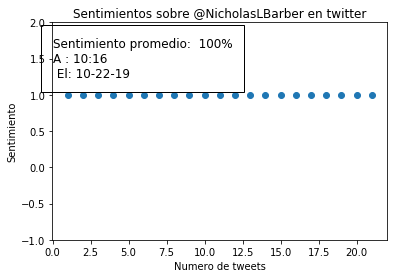

In [76]:
GraficarDatos(numeros_list,popularidad_list,numero)